In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
 df = pd.read_csv("/content/Housing.csv")


In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [ ]:
categorical_cols

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [ ]:
price_median = df['price'].median()
df['price_binary'] = (df['price'] > price_median).astype(int)


X = df.drop(['price', 'price_binary'], axis=1)
y = df['price_binary']

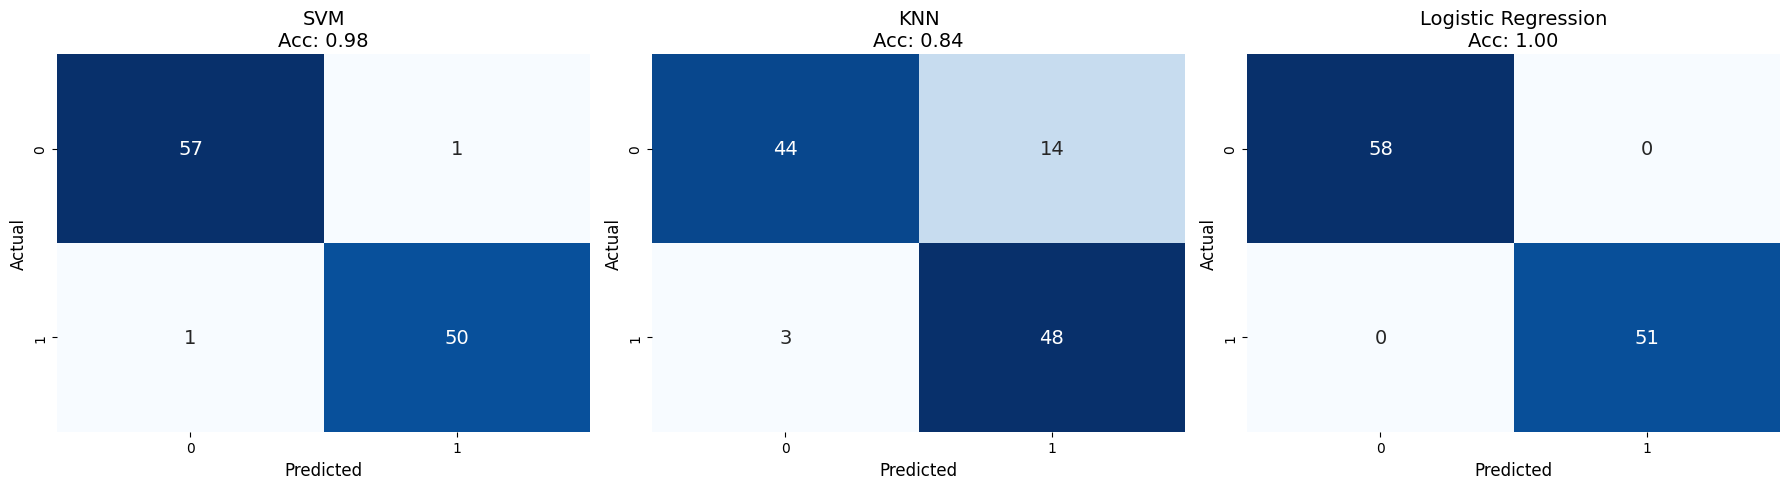

                     Accuracy  Precision    Recall  F1 Score  Train Score  \
Model                                                                       
SVM                  0.981651   0.980392  0.980392  0.980392     0.993119   
KNN                  0.844037   0.774194  0.941176  0.849558     0.894495   
Logistic Regression  1.000000   1.000000  1.000000  1.000000     0.986239   

                     Test Score  
Model                            
SVM                    0.981651  
KNN                    0.844037  
Logistic Regression    1.000000  


/tmp/ipython-input-1637728697.py:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_accuracy.index, y=model_accuracy['Accuracy'], palette="viridis")


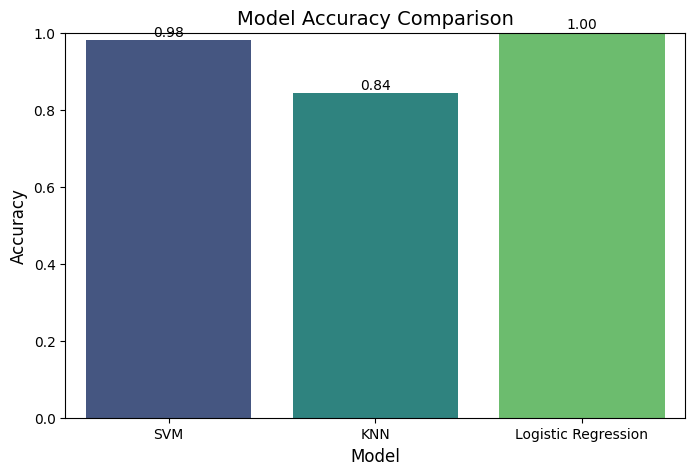

In [ ]:


df = pd.read_csv("/content/Housing.csv")

if 'price_binary' not in df.columns:
    price_median = df['price'].median()
    df['price_binary'] = (df['price'] > price_median).astype(int)

categorical_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

categorical_cols_encoded = df.select_dtypes(include=['int64']).columns.tolist()
if 'price_binary' in categorical_cols_encoded:
    categorical_cols_encoded.remove('price_binary')

mi_scores = mutual_info_classif(df[categorical_cols_encoded], df['price_binary'], discrete_features=True)
mi_df = pd.DataFrame({'Feature': categorical_cols_encoded, 'MI Score': mi_scores})
selected_categorical = mi_df[mi_df['MI Score'] > 0.01]['Feature'].tolist()

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
if 'price' in numeric_cols:
    numeric_cols.remove('price')
if 'price_binary' in numeric_cols:
    numeric_cols.remove('price_binary')


target_corr = df[numeric_cols + ['price_binary']].corr()['price_binary'].abs()
selected_numeric = [col for col in numeric_cols if target_corr[col] > 0.05]

final_features = list(set(selected_categorical + selected_numeric))

X = df[final_features]
y = df['price_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


models = {
    "SVM": SVC(kernel='linear'),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}

results = []
fig, axes = plt.subplots(1, 3, figsize=(18,5))

for idx, (name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": precision_score(y_test, y_pred, zero_division=1),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "Train Score": model.score(X_train, y_train),
        "Test Score": model.score(X_test, y_test)
    })

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                ax=axes[idx], annot_kws={"size": 14})
    axes[idx].set_title(f"{name}\nAcc: {acc:.2f}", fontsize=14)
    axes[idx].set_xlabel("Predicted", fontsize=12)
    axes[idx].set_ylabel("Actual", fontsize=12)

plt.tight_layout()
plt.show()

model_accuracy = pd.DataFrame(results)
model_accuracy.set_index("Model", inplace=True)
print(model_accuracy)



plt.figure(figsize=(8,5))
sns.barplot(x=model_accuracy.index, y=model_accuracy['Accuracy'], palette="viridis")
plt.title("Model Accuracy Comparison", fontsize=14)
plt.ylabel("Accuracy", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.ylim(0, 1)
for i, acc in enumerate(model_accuracy['Accuracy']):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha='center', fontsize=10)
plt.show()

In [ ]:
numeric_cols

['area',
 'bedrooms',
 'bathrooms',
 'stories',
 'mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'parking',
 'prefarea',
 'furnishingstatus']

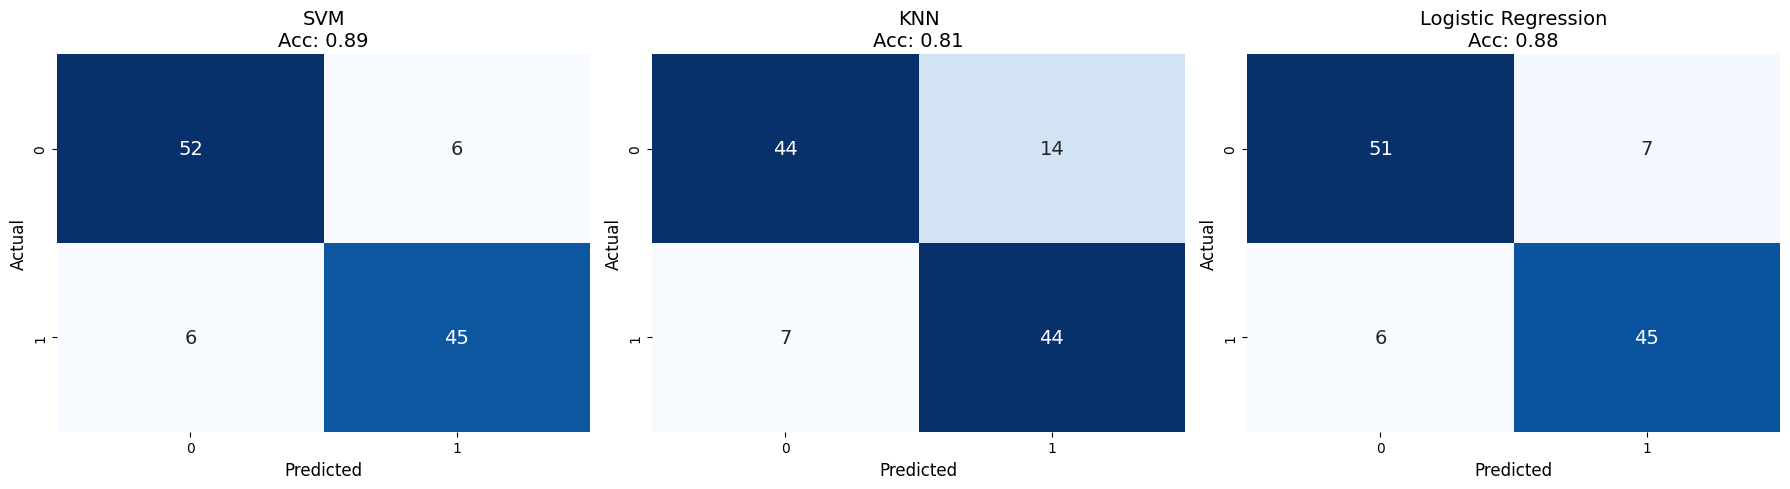

                     Accuracy  Precision    Recall  F1 Score  Train Score  \
Model                                                                       
SVM                  0.889908   0.882353  0.882353  0.882353     0.830275   
KNN                  0.807339   0.758621  0.862745  0.807339     0.848624   
Logistic Regression  0.880734   0.865385  0.882353  0.873786     0.827982   

                     Test Score  
Model                            
SVM                    0.889908  
KNN                    0.807339  
Logistic Regression    0.880734  


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

df = pd.read_csv("/content/Housing.csv")

price_median = df['price'].median()
df['price_binary'] = (df['price'] > price_median).astype(int)

categorical = df.select_dtypes(include=['object']).columns.tolist()
numerical = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
if 'price' in numerical:
    numerical.remove('price')
if 'price_binary' in numerical:
    numerical.remove('price_binary')

ohe_mi = OneHotEncoder(drop='first')
cat_encoded_mi = ohe_mi.fit_transform(df[categorical])
cat_encoded_df_mi = pd.DataFrame(cat_encoded_mi.toarray(), columns=ohe_mi.get_feature_names_out(categorical))

mi_scores = mutual_info_classif(cat_encoded_df_mi, df['price_binary'], discrete_features=True)
mi_df = pd.DataFrame({"Feature": ohe_mi.get_feature_names_out(categorical), "MI_Score": mi_scores})
mi_df = mi_df.sort_values(by="MI_Score", ascending=False)
selected_categorical = mi_df[mi_df["MI_Score"] > 0.03]["Feature"].tolist()

corr_df = df[numerical + ['price_binary']].corr()
selected_numerical = corr_df['price_binary'][abs(corr_df['price_binary']) > 0.05].index.tolist()
if 'price_binary' in selected_numerical:
    selected_numerical.remove('price_binary')

selected_original_categorical = list(set([col.split('_')[0] for col in selected_categorical]))

ohe = OneHotEncoder(drop='first')
cat_encoded = ohe.fit_transform(df[selected_original_categorical])
cat_encoded_df = pd.DataFrame(cat_encoded.toarray(), columns=ohe.get_feature_names_out(selected_original_categorical))

final_df = pd.concat([df[selected_numerical].reset_index(drop=True),
                      cat_encoded_df.reset_index(drop=True)], axis=1)

X = final_df
y = df['price_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

models = {
    "SVM": SVC(kernel='rbf', C=10, gamma=0.001),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}

results = []
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, (name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, zero_division=1),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "Train Score": model.score(X_train, y_train),
        "Test Score": model.score(X_test, y_test)
    })

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                ax=axes[idx], annot_kws={"size": 14})
    axes[idx].set_title(f"{name}\nAcc: {accuracy_score(y_test, y_pred):.2f}", fontsize=14)
    axes[idx].set_xlabel("Predicted", fontsize=12)
    axes[idx].set_ylabel("Actual", fontsize=12)

plt.tight_layout()
plt.show()

model_accuracy = pd.DataFrame(results)
model_accuracy.set_index("Model", inplace=True)
print(model_accuracy)





In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv("/content/Housing.csv")

price_median = df['price'].median()
df['price_binary'] = (df['price'] > price_median).astype(int)

categorical = df.select_dtypes(include=['object']).columns.tolist()
numerical = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
if 'price' in numerical:
    numerical.remove('price')
if 'price_binary' in numerical:
    numerical.remove('price_binary')

dict_data_categorical = df[categorical].to_dict(orient="records")
vec_categorical = DictVectorizer(sparse=False)
encoded_categorical_df = pd.DataFrame(vec_categorical.fit_transform(dict_data_categorical))

mi_scores = mutual_info_classif(encoded_categorical_df, df['price_binary'], discrete_features=True)
mi_df = pd.DataFrame({"Feature": vec_categorical.get_feature_names_out(), "MI_Score": mi_scores})
mi_df = mi_df.sort_values(by="MI_Score", ascending=False)
selected_categorical = mi_df[mi_df["MI_Score"] > 0.01]["Feature"].tolist()


corr_df = df[numerical + ['price_binary']].corr()
selected_numerical = corr_df['price_binary'][abs(corr_df['price_binary']) > 0.05].index.tolist()
if 'price_binary' in selected_numerical:
    selected_numerical.remove('price_binary')

selected_original_categorical = [col.split('=')[0] for col in selected_categorical]
selected_original_categorical = list(set(selected_original_categorical)) # Remove duplicates


df_selected = df[selected_original_categorical + selected_numerical + ['price_binary']]
train_dict = df_selected[selected_original_categorical + selected_numerical].to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_all = dv.fit_transform(train_dict)
y_all = df_selected['price_binary'].values

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# الموديلات
models = {
    "SVM": SVC(kernel='rbf', C=10, gamma=0.001),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, zero_division=1),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "Train Score": model.score(X_train, y_train),
        "Test Score": model.score(X_test, y_test)
    })

model_accuracy = pd.DataFrame(results)
model_accuracy.set_index("Model", inplace=True)
print(model_accuracy)

print("\nSelected Categorical Features after MI:", selected_categorical)
print("Selected Numerical Features after Corr:", selected_numerical)
print("Shape after DictVectorizer:", X_all.shape)



                     Accuracy  Precision    Recall  F1 Score  Train Score  \
Model                                                                       
SVM                  0.862385   0.938776  0.793103  0.859813     0.823394   
KNN                  0.798165   0.875000  0.724138  0.792453     0.837156   
Logistic Regression  0.853211   0.920000  0.793103  0.851852     0.839450   

                     Test Score  
Model                            
SVM                    0.862385  
KNN                    0.798165  
Logistic Regression    0.853211  

Selected Categorical Features after MI: ['airconditioning=yes', 'airconditioning=no', 'mainroad=yes', 'mainroad=no', 'prefarea=yes', 'prefarea=no', 'guestroom=yes', 'guestroom=no', 'furnishingstatus=unfurnished', 'basement=yes', 'basement=no', 'furnishingstatus=furnished']
Selected Numerical Features after Corr: ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
Shape after DictVectorizer: (545, 18)
